In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


## Read the dataset

In [2]:
df=pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Check the data type of columns

In [3]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

## Statistical summary of the dataset

In [4]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Data Imputation

In [5]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
df.drop(columns=['homepage', 'tagline','overview'], inplace=True,axis=1) 

In [7]:
df['runtime'].fillna(df['runtime'].mean(), inplace=True)

In [8]:
df.dropna(subset=['release_date'],inplace=True)

In [9]:
df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64


## Feature Engineering

### Create a new column 'profit_ratio'

In [10]:
df['profit_ratio']=df['revenue']/df['budget']

print(df['profit_ratio'].head())

0    11.763566
1     3.203333
2     3.594590
3     4.339756
4     1.092843
Name: profit_ratio, dtype: float64


In [11]:
df['profit_ratio'].isnull().sum()

889

In [12]:
df['profit_ratio'].fillna(df['profit_ratio'].mean(),inplace= True)

df['profit_ratio'].isnull().sum()

0

### Create a new column 'season'

In [13]:
# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract month as an integer
df['month'] = df['release_date'].dt.month

# Function to determine season
def get_season(release_date):
    month = release_date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'


df['season'] = df['release_date'].apply(get_season)

print(df[['release_date', 'season']].head())


  release_date  season
0   2009-12-10  Winter
1   2007-05-19  Spring
2   2015-10-26  Autumn
3   2012-07-16  Summer
4   2012-03-07  Spring


In [14]:
print(df.columns)

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'profit_ratio', 'month', 'season'],
      dtype='object')


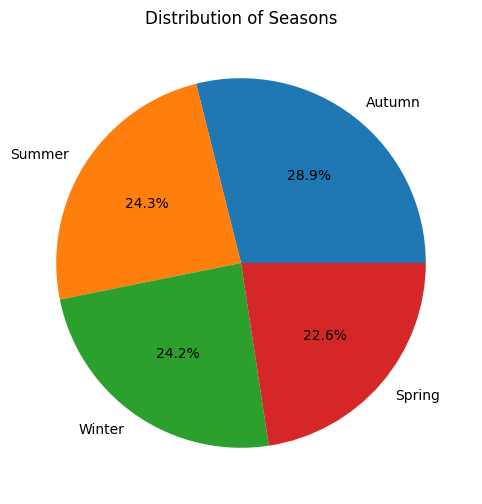

In [15]:
import matplotlib.pyplot as plt

season_counts = df['season'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Seasons')
plt.show()

## One hot encoding of 'season' column

In [16]:
df = pd.get_dummies(df, columns=['season'])
season_columns = [col for col in df.columns if col.startswith('season_')]


## One Hot Encoding of 'genres' column

In [17]:
df=pd.get_dummies(df,columns=['genres'])
print(df.head(2))


      budget     id                                           keywords  \
0  237000000  19995  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  300000000    285  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   

  original_language                            original_title  popularity  \
0                en                                    Avatar  150.437577   
1                en  Pirates of the Caribbean: At World's End  139.082615   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   

   ...  \
0  ...   
1  ...   

   genres_[{"id": 99, "name": "Documentary"}, {"id": 10402, "name": "Music"}]  \
0                   

In [ ]:
#print(df.columns)

In [32]:
genre_columns = [col for col in df.columns if col.startswith('genres_')]
print(genre_columns)


['genres_[]', 'genres_[{"id": 10402, "name": "Music"}, {"id": 10749, "name": "Romance"}]', 'genres_[{"id": 10402, "name": "Music"}, {"id": 12, "name": "Adventure"}, {"id": 16, "name": "Animation"}, {"id": 28, "name": "Action"}, {"id": 35, "name": "Comedy"}]', 'genres_[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 80, "name": "Crime"}]', 'genres_[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]', 'genres_[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}, {"id": 10751, "name": "Family"}]', 'genres_[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}, {"id": 35, "name": "Comedy"}]', 'genres_[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}, {"id": 80, "name": "Crime"}, {"id": 10749, "name": "Romance"}]', 'genres_[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}]', 'genres_[{"id": 10402, "name": "Music"}, {"id": 27, "name": "Horror"}]', 'genres_[{"i

## Remove Infinite Values , if any

In [19]:
numerical_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'profit_ratio']


# Check for infinite values
print(df[numerical_cols].isin([float('inf'), float('-inf')]).sum())

# Replace infinite values with NaN
df.replace([float('inf'), float('-inf')], np.nan, inplace=True)


df['profit_ratio'].fillna(df['profit_ratio'].median(), inplace=True)

print(df[numerical_cols].isnull().sum())  


print(np.isinf(df[numerical_cols]).sum()) 


budget             0
popularity         0
revenue            0
runtime            0
vote_average       0
vote_count         0
profit_ratio    1036
dtype: int64
budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
profit_ratio    0
dtype: int64
budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
profit_ratio    0
dtype: int64


## Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df[numerical_cols].head(2))

     budget  popularity    revenue   runtime  vote_average  vote_count  \
0  5.106771    4.052813  16.614315  2.443050      0.928811    8.998969   
1  6.653913    3.695909   5.395808  2.753409      0.677001    3.085862   

   profit_ratio  
0     -0.015997  
1     -0.016067  


## Conditions for Hit/Flop

In [22]:
budget_threshold = df['budget'].quantile(0.50) 
autumn_season_flag = df['season_Autumn']  

df['success'] = (
    ((df['budget'] > budget_threshold).astype(int) +  
     (autumn_season_flag > 0).astype(int)) >= 1      
).astype(int)


## Visualization of Hit vs Flop

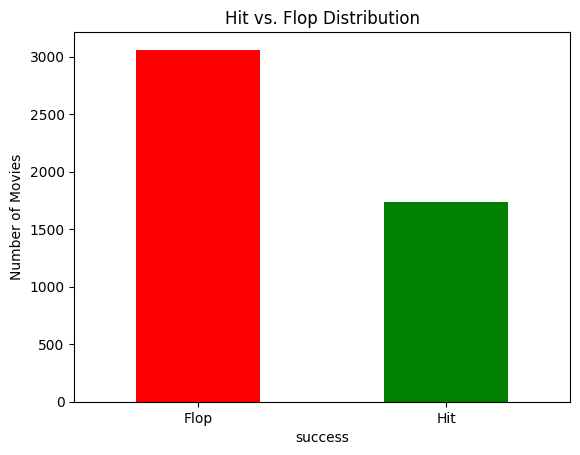

In [23]:
import matplotlib.pyplot as plt
df['success'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Hit vs. Flop Distribution')
plt.xticks([0, 1], ['Flop', 'Hit'], rotation=0)
plt.ylabel('Number of Movies')
plt.show()


## Logistic Regression Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df[['budget','runtime', 'season_Spring', 'season_Summer', 'season_Autumn', 'season_Winter' ]+ genre_columns] 

y = df['success'] 

X_train,X_test , y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=42)
model=LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

#Predictions on test set
y_pred = model.predict(X_test)

## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

# Model Accuracy

## Logistic Regression

In [27]:
# Accuracy Score
from sklearn.metrics import accuracy_score
test_acc=accuracy_score(y_test,y_pred)
print("Accuracy:",test_acc)

Accuracy: 0.9906347554630593


In [28]:
#Classification Report , Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[343   0]
 [  9 609]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       343
           1       1.00      0.99      0.99       618

    accuracy                           0.99       961
   macro avg       0.99      0.99      0.99       961
weighted avg       0.99      0.99      0.99       961



## Decision Tree

In [29]:
#Accuracy Score

test_predictions=clf.predict(X_test)
from sklearn.metrics import accuracy_score
test_acc=accuracy_score(y_test,test_predictions)
print("Accuracy of Decision Tree Classifier :",test_acc)

Accuracy of Decision Tree Classifier : 1.0


In [30]:
# Classification Report , Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix

con_tree=print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

[[343   0]
 [  0 618]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       343
           1       1.00      1.00      1.00       618

    accuracy                           1.00       961
   macro avg       1.00      1.00      1.00       961
weighted avg       1.00      1.00      1.00       961

